# final project - KICKSTARTER

**What is Kickstarter?**

Kickstarter is a funding platform for creative projects. Everything from film, games, and music to art, design, and technology. Kickstarter is full of ambitious, innovative, and imaginative projects that are brought to life through the direct support of others.

Every project creator sets their project's funding goal and deadline. If people like the project, they can pledge money to make it happen. If the project succeeds in reaching its funding goal, all backers' credit cards are charged when time expires. Funding on Kickstarter is all-or-nothing. If the project falls short of its funding goal, no one is charged.

**Objective**

Goal of this analysis it to be able to predict whether or not a project will receive it's goal funds.

## import libraries

In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import glob
from datetime import date
import math

# scipy libraries
from scipy import stats
from scipy.stats.mstats import winsorize

# statsmodels libraries
import statsmodels.api as sm
from statsmodels.formula.api import ols

# sklearn libraries
from sklearn.preprocessing import OneHotEncoder, Normalizer, LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix
from sklearn.neighbors import KNeighborsRegressor

# balancing libraries
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks

# language libraries
from textblob import TextBlob
import langid
import yake

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

## import data

In [69]:
files = os.listdir('Data')
files

['dataset_my-task-1_2021-10-31_18-52-00-573.xlsx',
 'dataset_my-task-1_2021-10-31_22-32-25-255.xlsx',
 'dataset_my-task-2_2021-10-31_18-52-00-523.xlsx',
 'dataset_my-task-2_2021-10-31_22-37-00-186.xlsx',
 'dataset_my-task-3_2021-10-31_18-52-00-929.xlsx',
 'dataset_my-task-3_2021-10-31_22-32-19-791.xlsx',
 'dataset_my-task-4_2021-10-31_18-51-58-474.xlsx',
 'dataset_my-task-4_2021-10-31_22-32-30-946.xlsx',
 'dataset_my-task_2021-10-31_18-51-58-693.xlsx',
 'dataset_my-task_2021-10-31_22-32-41-350.xlsx',
 'kickstarter_all_enddate_30102021.xlsx',
 'kickstarter_all_mostbacked.xlsx',
 'kickstarter_all_newest_30102021.xlsx',
 'kickstarter_all_popularity_30102021.xlsx',
 'kickstarter_art_enddate.xlsx',
 'kickstarter_art_newest.xlsx',
 'kickstarter_comics_enddate.xlsx',
 'kickstarter_comics_newest.xlsx',
 'kickstarter_crafts_enddate.xlsx',
 'kickstarter_crafts_newest.xlsx',
 'kickstarter_dance_enddate.xlsx',
 'kickstarter_dance_enddate2.xlsx',
 'kickstarter_dance_newest.xlsx',
 'kickstarter_desi

In [70]:
files = os.listdir('Data')

df = pd.DataFrame()

path = os.getcwd() + "\\Data" + "\\"

for i in files:
    data = pd.read_excel(path + i)
    df = df.append(data)

## first review and clean data

### review

In [71]:
print("This dataset contains {} rows and {} columns".format(*df.shape))

This dataset contains 27168 rows and 47 columns


In [72]:
df.sample(5)

,backers_count,blurb,categoryId,categoryName,categorySlug,converted_pledged_amount,country,country_displayable_name,created_at,created_at_formatted,...,state,state_changed_at,static_usd_rate,title,url,usd_exchange_rate,usd_pledged,usd_type,is_backing,is_starred
1252,129,"Prepare for...AlternoVision, a new collection ...",1,Art,art,7540,US,the United States,1622058885,"Wed, 26 May 2021 19:54:45 +0000",...,successful,1623643140,1.000000,AlternoVision: a 1980s Collection,https://www.kickstarter.com/projects/matthewbu...,1.000000,7540.000000,international,NaN,NaN
791,13538,If a Kleenex pack and a Handkerchief had a Baby,28,Product Design,design/product design,792553,US,the United States,1567678179,"Thu, 05 Sep 2019 10:09:39 +0000",...,successful,1584018732,1.000000,LastTissue™ - The Reusable Tissue Pack,https://www.kickstarter.com/projects/193289139...,1.000000,792553.000000,international,NaN,NaN
2228,3,Hearts made from rocks and minerals ground and...,267,Jewelry,fashion/jewelry,631,US,the United States,1570914150,"Sat, 12 Oct 2019 21:02:30 +0000",...,successful,1577901600,1.000000,"Hearts of Stone... and other minerals, a lapid...",https://www.kickstarter.com/projects/126293049...,1.000000,631.000000,international,NaN,NaN
20,773,The Redhead is back for another thrilling tale...,250,Comic Books,comics/comic books,26101,US,the United States,1634094667,"Wed, 13 Oct 2021 03:11:07 +0000",...,live,1635256815,1.000000,THE FEW AND CURSED #7 - a New Season begins!,https://www.kickstarter.com/projects/felipecag...,1.000000,26101.000000,domestic,False,False
1858,958,"USB-C Connection Charge Anywhere, High Power D...",28,Product Design,design/product design,78098,HK,Hong Kong,1610755627,"Sat, 16 Jan 2021 00:07:07 +0000",...,successful,1615442400,0.128996,Solarcell: Next Gen Solar-Powered Li-Po Rechar...,https://www.kickstarter.com/projects/solarcell...,0.128849,78188.243372,international,NaN,NaN


### review column names

In [73]:
df.columns

Index(['backers_count', 'blurb', 'categoryId', 'categoryName', 'categorySlug',
       'converted_pledged_amount', 'country', 'country_displayable_name',
       'created_at', 'created_at_formatted', 'creatorAvatar', 'creatorId',
       'creatorName', 'creatorUrl', 'currency', 'currency_symbol',
       'currency_trailing_code', 'current_currency', 'deadline', 'description',
       'disable_communication', 'fx_rate', 'goal', 'id', 'is_starrable',
       'launched_at', 'launched_at_formatted', 'link', 'locationId',
       'locationName', 'name', 'photo', 'pledged', 'pubDate', 'slug',
       'spotlight', 'staff_pick', 'state', 'state_changed_at',
       'static_usd_rate', 'title', 'url', 'usd_exchange_rate', 'usd_pledged',
       'usd_type', 'is_backing', 'is_starred'],
      dtype='object')

no cleaning of column names required

### Drop Duplicates

In [74]:
df.shape

(27168, 47)

In [75]:
df = df.drop_duplicates()

In [76]:
df.shape

(25120, 47)

2.048 duplicates have been dropped

### drop duplicate projects with different values

#### check for duplicate projects

In [77]:
df.duplicated(subset='id', keep='first').sum()

7500

There are 7.500 duplicated projects present.

#### review duplicates

In [78]:
df[df.duplicated(subset=['id'],keep=False)].sort_values(by=['id'])

,backers_count,blurb,categoryId,categoryName,categorySlug,converted_pledged_amount,country,country_displayable_name,created_at,created_at_formatted,...,state,state_changed_at,static_usd_rate,title,url,usd_exchange_rate,usd_pledged,usd_type,is_backing,is_starred
1976,7798,Reuse and recycle plastic bottles of all kinds...,28,Product Design,design/product design,400276,FR,France,1454599119,"Thu, 04 Feb 2016 15:18:39 +0000",...,successful,1461409167,1.111204,Plastic Bottle Cutter,https://www.kickstarter.com/projects/910418035...,1.12246,396262.032441,domestic,NaN,NaN
1976,7798,Reuse and recycle plastic bottles of all kinds...,28,Product Design,design/product design,400276,FR,France,1454599119,"Thu, 04 Feb 2016 15:18:39 +0000",...,successful,1461409167,1.111204,Plastic Bottle Cutter,https://www.kickstarter.com/projects/910418035...,1.12246,396262.032441,international,NaN,NaN
213,78,A fun hackable handheld gaming console & learn...,52,Hardware,technology/hardware,8054,GB,the United Kingdom,1634240494,"Thu, 14 Oct 2021 19:41:34 +0000",...,live,1635346827,1.376580,8BitCADE Level UP - Fun Hackable Game Console ...,https://www.kickstarter.com/projects/jackdaly/...,1.37947,8038.070698,domestic,NaN,NaN
208,78,A fun hackable handheld gaming console & learn...,52,Hardware,technology/hardware,8054,GB,the United Kingdom,1634240494,"Thu, 14 Oct 2021 19:41:34 +0000",...,live,1635346827,1.376580,8BitCADE Level UP - Fun Hackable Game Console ...,https://www.kickstarter.com/projects/jackdaly/...,1.37947,8038.070698,domestic,NaN,NaN
1818,109,A 78 card tarot deck with a little bit of ever...,22,Illustration,art/illustration,13082,US,the United States,1612369415,"Wed, 03 Feb 2021 16:23:35 +0000",...,successful,1618113600,1.000000,The Fools Tarot,https://www.kickstarter.com/projects/nyahouse/...,1.00000,13082.000000,international,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,114,A collection of Lewd Art and Comics about Mons...,22,Illustration,art/illustration,2334,GB,the United Kingdom,1630222933,"Sun, 29 Aug 2021 07:42:13 +0000",...,live,1630571977,1.373808,Monster Layer,https://www.kickstarter.com/projects/marcodrag...,1.36850,2343.715663,domestic,NaN,NaN
50,98,A collection of Lewd Art and Comics about Mons...,22,Illustration,art/illustration,2027,GB,the United Kingdom,1630222933,"Sun, 29 Aug 2021 07:42:13 +0000",...,live,1630571977,1.373808,Monster Layer,https://www.kickstarter.com/projects/marcodrag...,1.37947,2019.497084,international,NaN,NaN
166,113,A collection of Lewd Art and Comics about Mons...,22,Illustration,art/illustration,2292,GB,the United Kingdom,1630222933,"Sun, 29 Aug 2021 07:42:13 +0000",...,live,1630571977,1.373808,Monster Layer,https://www.kickstarter.com/projects/marcodrag...,1.36850,2301.127630,domestic,NaN,NaN
1102,38,"An indie pilot about two best friends,Mugshot ...",290,Video Art,art/video art,1537,US,the United States,1622493756,"Mon, 31 May 2021 20:42:36 +0000",...,successful,1628103600,1.000000,Mugshot&Pollen (Animated Pilot),https://www.kickstarter.com/projects/mnpcartoo...,1.00000,1537.000000,domestic,NaN,NaN


#### drop double listing of projects

In [79]:
df = (df.sort_values(by=['id', 'pubDate'], ascending=False).drop_duplicates(subset='id', keep= 'first').reset_index(drop=True))

#### set id as index and review shape after drop

In [80]:
df = df.set_index('id')

In [81]:
df.shape

(17620, 46)

### drop columns

In [82]:
to_drop = ['blurb', 
           'categoryId', 
           'country_displayable_name', 
           'creatorAvatar', 
           'creatorId', 
           'creatorName', 
           'creatorUrl', 
           'currency_symbol', 
           'link', 
           'locationId', 
           'slug', 
           'title', 
           'url']

In [83]:
df = df.drop(to_drop, axis=1)

In [84]:
df.shape

(17620, 33)

In [85]:
df.columns

Index(['backers_count', 'categoryName', 'categorySlug',
       'converted_pledged_amount', 'country', 'created_at',
       'created_at_formatted', 'currency', 'currency_trailing_code',
       'current_currency', 'deadline', 'description', 'disable_communication',
       'fx_rate', 'goal', 'is_starrable', 'launched_at',
       'launched_at_formatted', 'locationName', 'name', 'photo', 'pledged',
       'pubDate', 'spotlight', 'staff_pick', 'state', 'state_changed_at',
       'static_usd_rate', 'usd_exchange_rate', 'usd_pledged', 'usd_type',
       'is_backing', 'is_starred'],
      dtype='object')

### review dtypes

In [87]:
### Review DTypes

df.dtypes

# boolean columns death_event, smoking, sex, high_blood_pressure, diabetes, anaemia

#data = data.astype({'death_event':'boolean', 'sex':'boolean', 'smoking':'boolean', 'high_blood_pressure':'boolean','diabetes':'boolean','anaemia':'boolean','age':'int64'})

df.dtypes

backers_count                 int64
categoryName                 object
categorySlug                 object
converted_pledged_amount      int64
country                      object
created_at                    int64
created_at_formatted         object
currency                     object
currency_trailing_code         bool
current_currency             object
deadline                      int64
description                  object
disable_communication          bool
fx_rate                     float64
goal                        float64
is_starrable                   bool
launched_at                   int64
launched_at_formatted        object
locationName                 object
name                         object
photo                       float64
pledged                     float64
pubDate                      object
spotlight                      bool
staff_pick                     bool
state                        object
state_changed_at              int64
static_usd_rate             

to review

### Null Values

In [89]:
df.isna().any()

backers_count               False
categoryName                False
categorySlug                False
converted_pledged_amount    False
country                     False
created_at                  False
created_at_formatted        False
currency                    False
currency_trailing_code      False
current_currency            False
deadline                    False
description                  True
disable_communication       False
fx_rate                     False
goal                        False
is_starrable                False
launched_at                 False
launched_at_formatted       False
locationName                False
name                        False
photo                        True
pledged                     False
pubDate                     False
spotlight                   False
staff_pick                  False
state                       False
state_changed_at            False
static_usd_rate             False
usd_exchange_rate           False
usd_pledged   

No null values present in this dataset

### Data Values

In [90]:
for col in data:
    print(data[col].value_counts(), '\n')

3199     1
7713     1
44949    1
81567    1
83193    1
78471    1
88887    1
27168    1
68929    1
62642    1
66673    1
19264    1
Name: backers_count, dtype: int64 

Expandable capacity (3.6-25kWh) | Power almost anything (3.6-7.2kW) | Home battery ecosystem                                               1
A revolutionary table that evolves over a lifetime. Innovative, yet affordable, with magnetic accessories. Crafted without compromise.     1
A full-featured tripod in a truly portable form.                                                                                           1
Two affordable, heart rate-enabled smartwatches and a hackable, 3G wearable for phone-free running with GPS, music, and Amazon Alexa.      1
Pebble is a customizable watch. Download new watchfaces, use sports and fitness apps, get notifications from your phone.                   1
The COOLEST is a portable party disguised as a cooler, bringing blended drinks, music and fun to any outdoor occasion.         

### convert timestamps

In [91]:
test = 1633202074

print(
    datetime.datetime.fromtimestamp(
        int(test)
    ).strftime('%Y-%m-%d')
)

print(
    datetime.datetime.fromtimestamp(
        int(test)
    ).strftime('%H:%M:%S')
)

print(
    datetime.datetime.fromtimestamp(
        int(test)
    ).strftime('%A')
)

NameError: name 'datetime' is not defined

In [92]:
def time_converter(col):
    
    for i in col:
        
        date_col_name = (col + '_date')
        df[date_col_name] = datetime.datetime.fromtimestamp(int(i)).strftime('%Y-%m-%d')
        
        time_col_name = (col + '_time')
        df.eval[col + '_time'] = datetime.datetime.fromtimestamp(int(i)).strftime('%H:%M:%S')
        
        weekday_col_name = (col + '_weekday')
        df[weekday_col_name] = datetime.datetime.fromtimestamp(int(i)).strftime('%A')

In [93]:
time_converter(df['created_at'])

ValueError: unknown type str160

### add target column

In [94]:
conditions = [
    ((df['goal'] - df['converted_pledged_amount']) >= 0),
    ((df['goal'] - df['converted_pledged_amount']) < 0)
]

values = ['yes', 'no']

df['goal_reached'] = np.select(conditions, values)

In [95]:
df['goal_reached'].value_counts()

no     15250
yes     2370
Name: goal_reached, dtype: int64

In [96]:
df['state'].value_counts()

successful    15409
live           2211
Name: state, dtype: int64

In [97]:
data_crosstab = pd.crosstab(df['state'], df['goal_reached'], margins = False)
data_crosstab

goal_reached,no,yes
state,,
live,949,1262
successful,14301,1108


## get information from language

### add language column

In [65]:
df['description']

id
2147420152    Beautiful, comfortable lingerie and sewing wor...
2147364781    The Bang Group returns to the Edinburgh Fringe...
2147339483    With your support, Movema can relocate to offi...
2147336747    The Dance Project is an exciting new vision - ...
2147319993    An indie pilot about two best friends,Mugshot ...
                                    ...                        
771637        Guitars designed to make it fun and easy to pl...
442565        Designing classy, simple, and sometimes vintag...
368761        NYX is a collection of modern and practical de...
127800        An exploration of gender dysphoria, euphoria, ...
59422         A halloween enamel pin of a dachshund that wil...
Name: description, Length: 17620, dtype: object

In [98]:
language = []

for i in df['description']:
    if i is None:
        language.append("")
    else:
        a = langid.classify(i)
        language.append(a[0])        
    
df['language'] = language

TypeError: 'float' object is not iterable

In [50]:
df.shape

(17620, 35)

In [51]:
df['language'].value_counts()

Im creating custom , funny gag gifts that are great for the person who has everything , hard to buy for or just for Laughs !!        9
Hard Enamel Pins                                                                                                                     7
2 inch tall Sexy Anime Girl Hard Enamel Pins                                                                                         4
A meeting of performing and creative artists, educators and producers working across artistic disciplines and cultural divides       4
Crappy Custom Postcard Drawings ...and poetry too!                                                                                   4
                                                                                                                                    ..
The second issue of Twilight Detective Agency by Two Gargoyles Comics!                                                               1
A feature film based on Donald Miller's New York Times 

### add polarity and subjectivity column

In [31]:
polarity = []
subjectivity = []

for i in df['description']:
    a = TextBlob(i)
    polarity.append(round(a.polarity,2))
    subjectivity.append(round(a.subjectivity,2))

df['polarity'] = polarity
df['subjectivity'] = subjectivity

TypeError: The `text` argument passed to `__init__(text)` must be a string, not <class 'float'>

In [32]:
df.shape

(17620, 34)

### add length for columns name and description

In [378]:
length_name = []
length_description = []

for i,j in zip(df.name, df.description):
    length_name.append(len(i))
    length_description.append(len(j))
    
df['length_name'] = length_name
df['length_description'] = length_description

In [379]:
df.shape

(15637, 52)

### keyword extractions with yake

In [212]:
kw_extractor = yake.KeywordExtractor()

In [213]:
text # from description column

In [214]:
language # from language column

In [215]:
max_ngram_size = 1

In [216]:
deduplication_threshold = 0.9

In [217]:
numOfKeywords = 1

In [218]:
custom_kw_extractor = yake.KeywordExtractor(lan=language, n=max_ngram_size, dedupLim=deduplication_threshold, top=numOfKeywords, features=None)

In [219]:
keywords = custom_kw_extractor.extract_keywords(text)

In [220]:
for kw in keywords:
    print(kw)

('Kickstarter', 0.10900243566337642)


## Explore Cleaned Data

### Check for Correlation

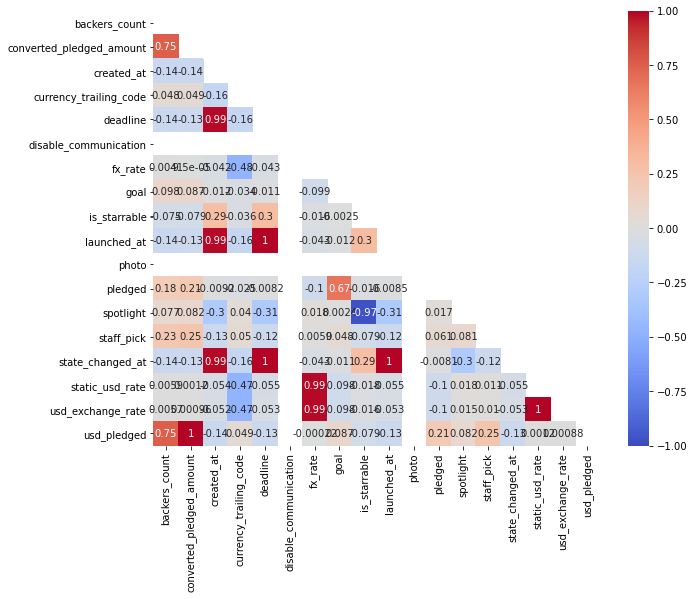

In [33]:
#round(df.corr()['death_event'].sort_values(ascending=False),2)

# create correlation heatmap 

mask = np.zeros_like(df.corr())

mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='coolwarm')

plt.show()

## data imbalances

### check whether data is imbalanced

no     15250
yes     2370
Name: goal_reached, dtype: int64

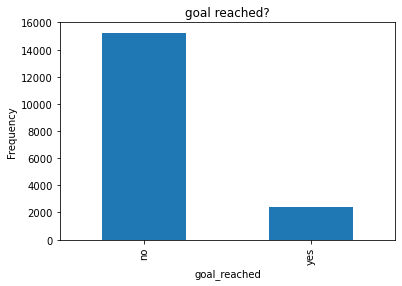

In [34]:
pd.value_counts(df['goal_reached']).plot.bar()
plt.title('goal reached?')
plt.xlabel('goal_reached')
plt.ylabel('Frequency')
df['goal_reached'].value_counts()

**YES** our data is imbalanced, as we have 13.324 'no' values and 2.313 'yes' values

### deal with imbalances